# Importando Librerias

In [1]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.graphics.api as smg
from scipy import stats
from matplotlib.patheffects import withStroke
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
import math

import warnings

warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')
%matplotlib inline

# Leyendo rasters

## Cuenca

Cuenca B1
Forma:  (653, 1326)
Valores únicos:  [ 1. nan]


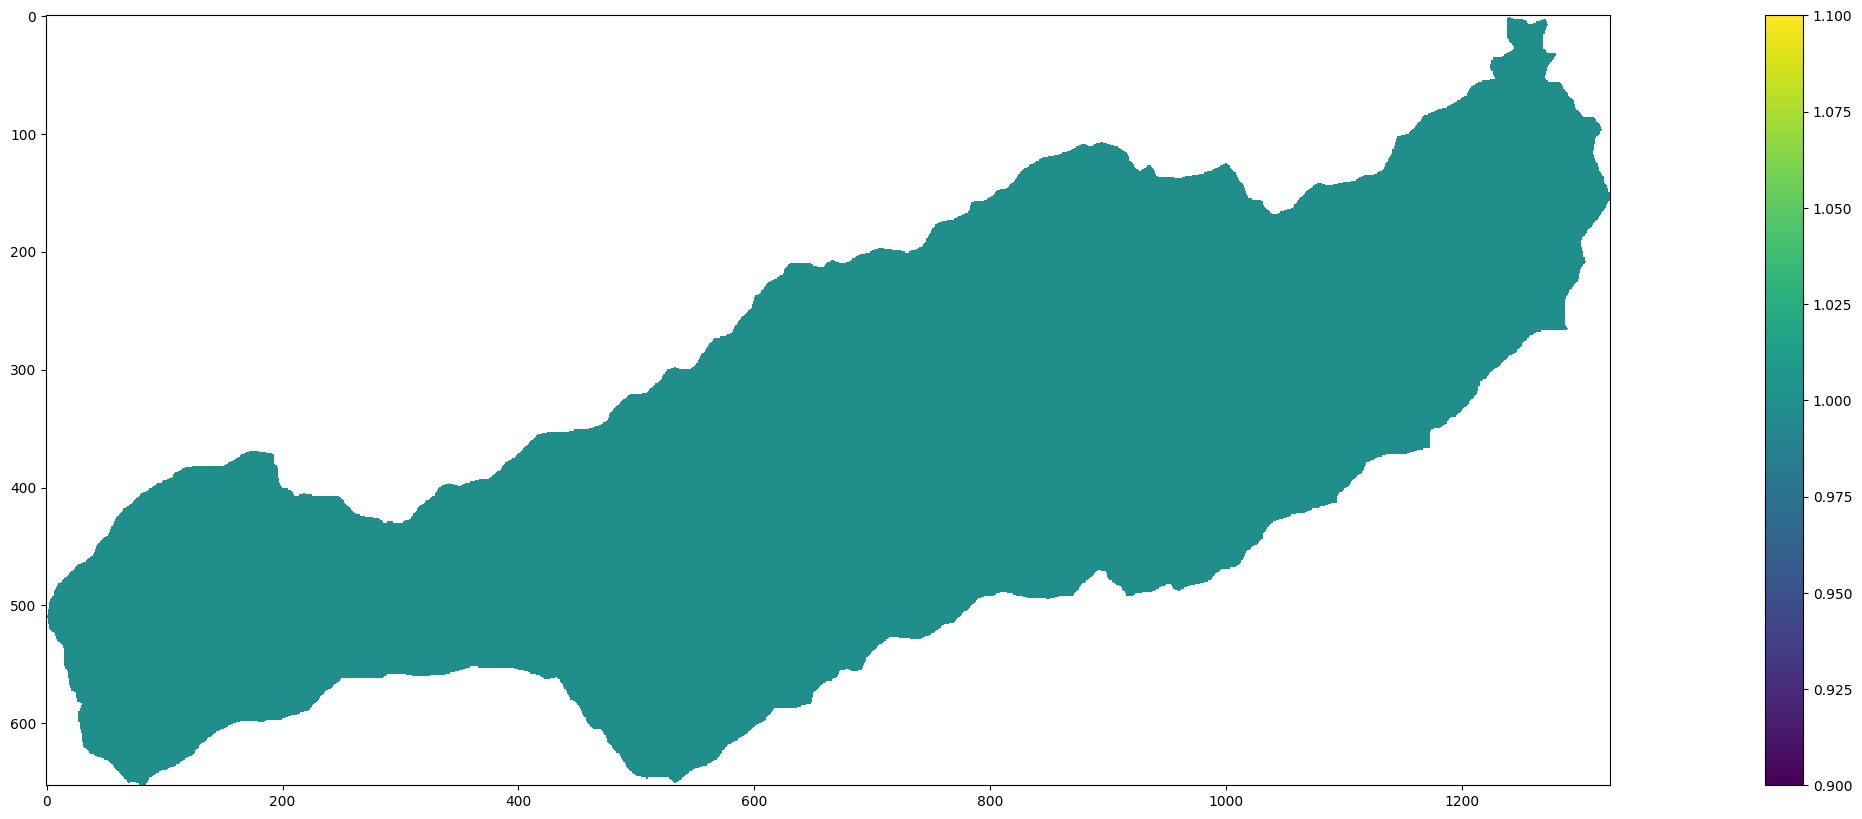

In [2]:
raster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2003%20-%20Informaci%C3%B3n%20secundaria/Cuenca_tif/CuencaZona2.tif?raw=true')
cuencaB1 = raster.read(1)

# Correción para organizar luego los otros valores
cuencaB1 = np.where(cuencaB1 == 1, np.nan, 1)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(cuencaB1)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', cuencaB1.shape)
print('Valores únicos: ', np.unique(cuencaB1))

# Inventario

InventarioB1
Forma:  (653, 1326)
Valores únicos:  [0 1]


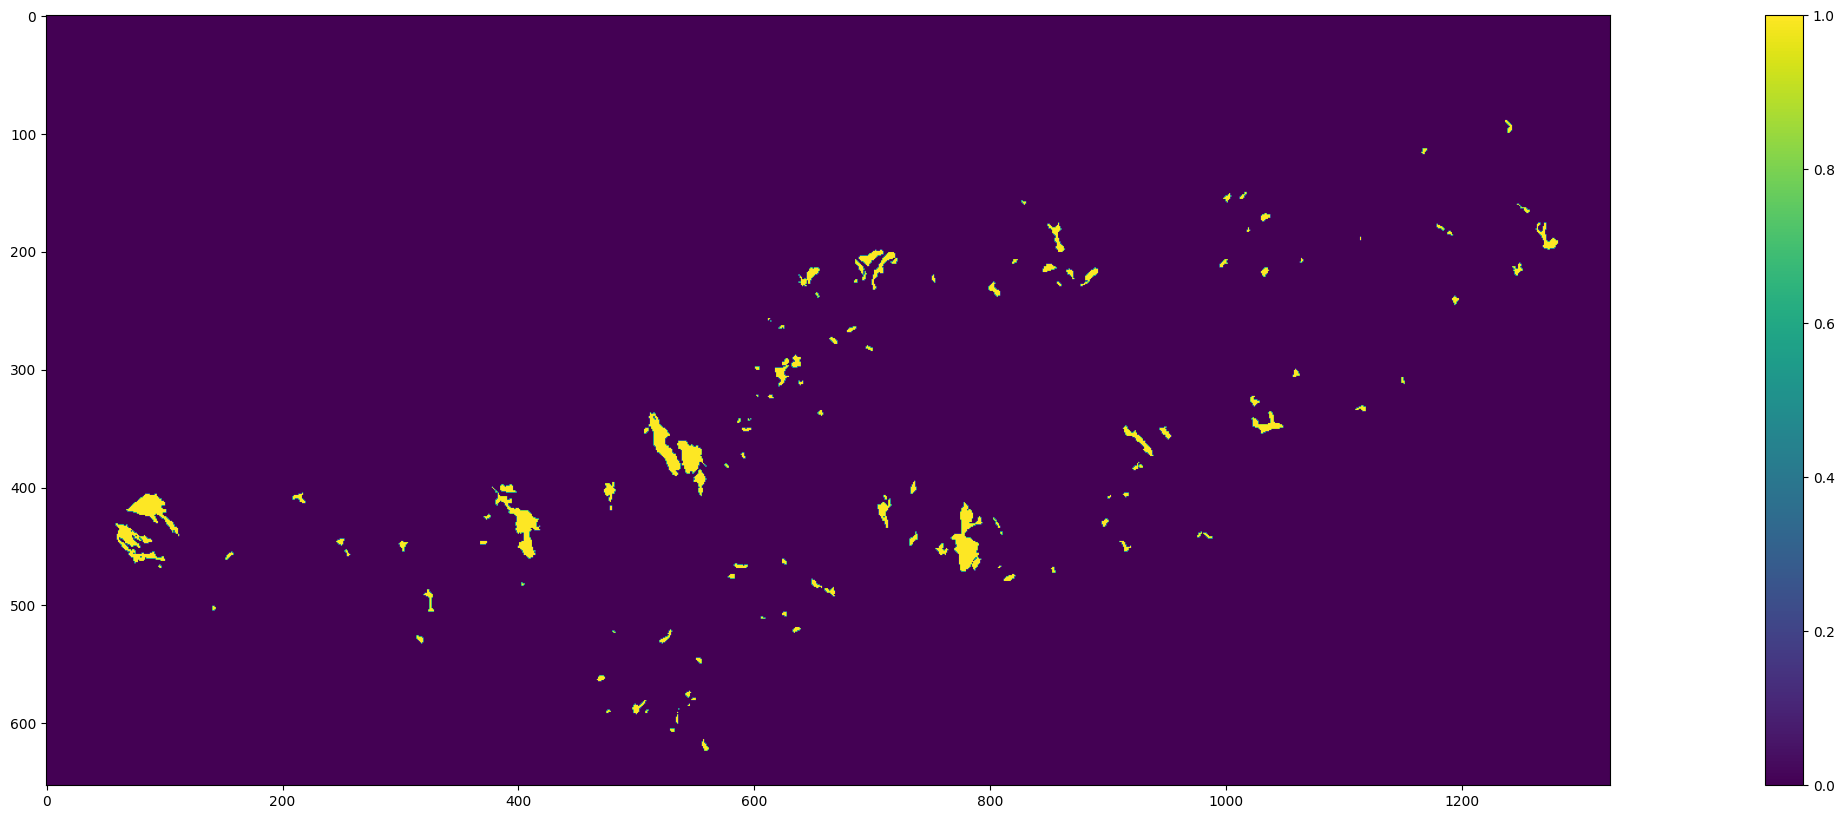

In [3]:
inventarioRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2004%20-%20Inventario/Tiff/InventarioZona.tif?raw=true')
inventarioB1 = inventarioRaster.read(1)

# Correción para organizar luego los otros valores
inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioB1)
plt.colorbar();

print('InventarioB1')
print('Forma: ', inventarioB1.shape)
print('Valores únicos: ', np.unique(inventarioB1))

Cuenca B1
Forma:  (653, 1326)
Valores únicos:  [ 0.  1. nan]


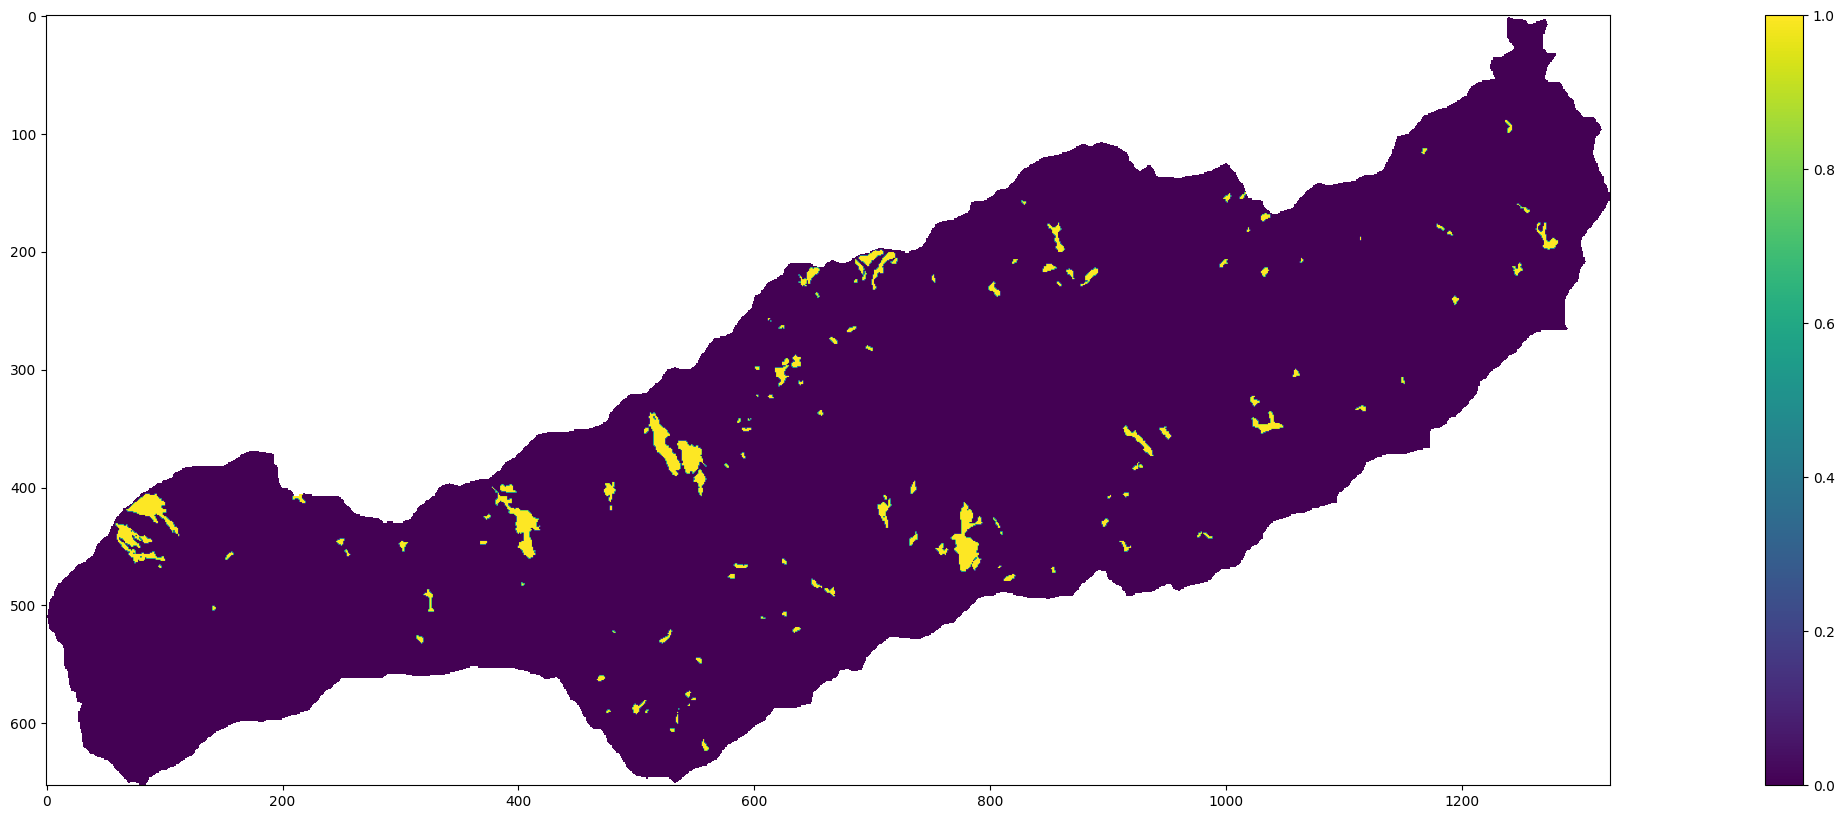

In [4]:
inventarioZona = inventarioB1 * cuencaB1

#inventarioB1 = np.where(inventarioB1 == 1, inventarioB1, 0)


plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(inventarioZona)
plt.colorbar();

print('Cuenca B1')
print('Forma: ', inventarioZona.shape)
print('Valores únicos: ', np.unique(inventarioZona))

#plt.savefig('InventarioLectura.png', dpi=500, bbox_inches='tight')

# Cohesión

Cohesión
Forma:  (653, 1326)
Valores únicos:  [13.   15.86 18.13 27.   32.     nan]


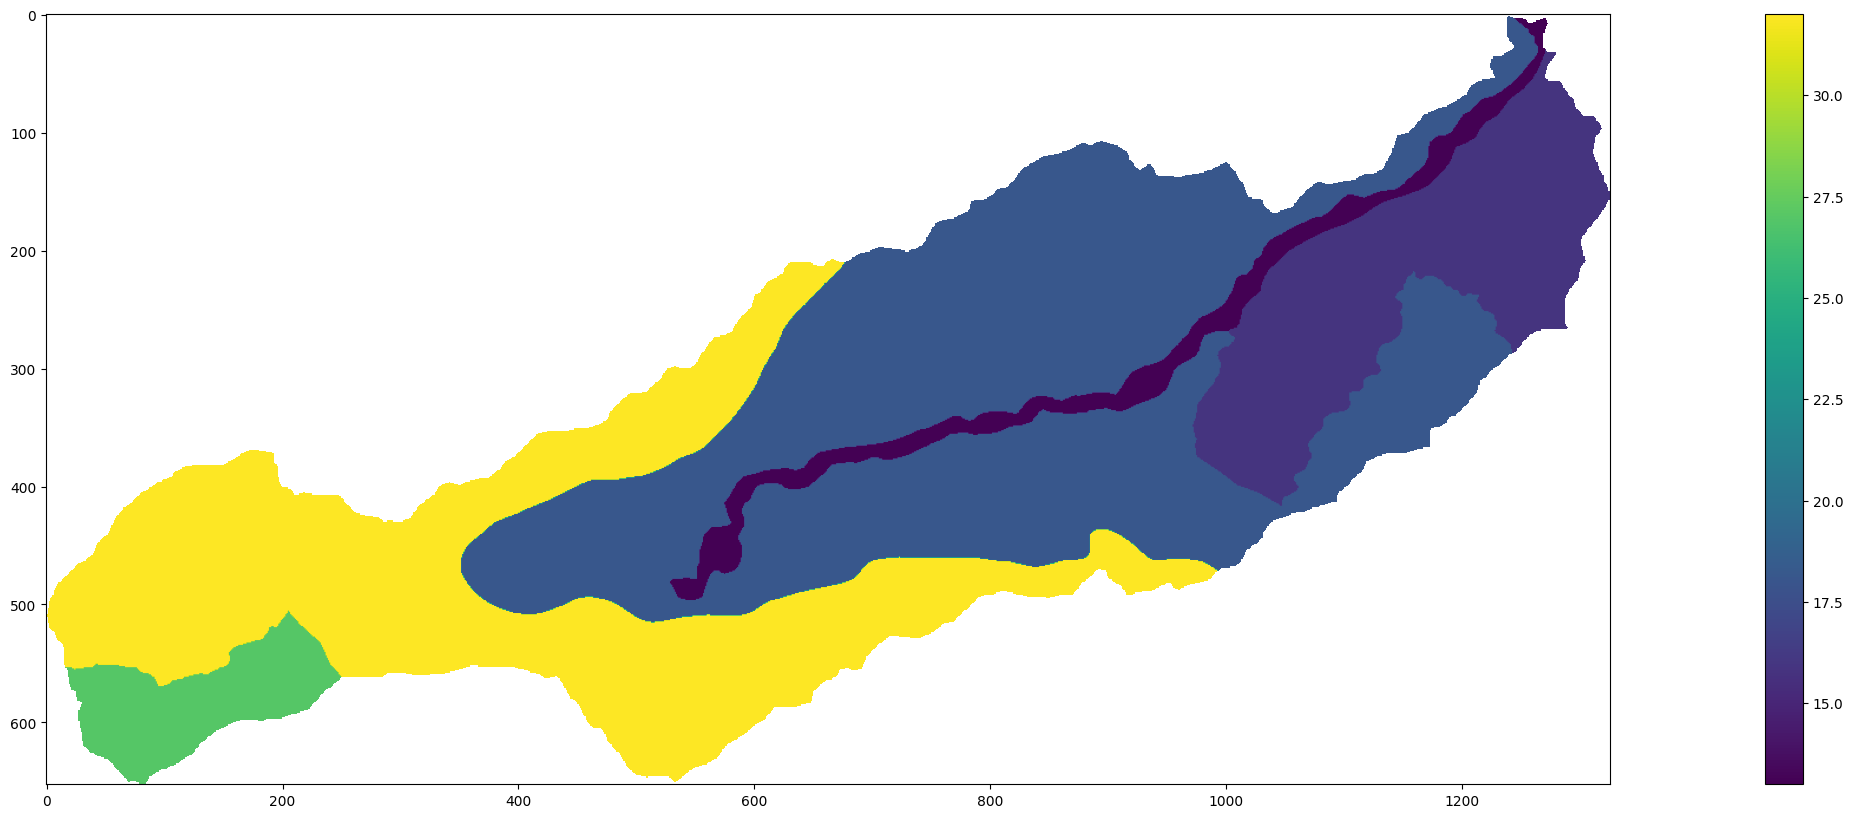

In [5]:
cohesionRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2010%20-%20M%C3%A9todos%20f%C3%ADsicos%20acoplados/Datos%20Geot%C3%A9cnicos/Cohesion.tif?raw=true')
cohesion = cohesionRaster.read(1)

cohesion = np.where(cohesion < 0, np.nan, cohesion)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(cohesion)
plt.colorbar();

print('Cohesión')
print('Forma: ', cohesion.shape)
print('Valores únicos: ', np.unique(cohesion))

## Ángulo de Fricción (rad)

Fricción
Forma:  (653, 1326)
Valores únicos:  [0.383972 0.558505 0.593412 0.663225 0.698132      nan]


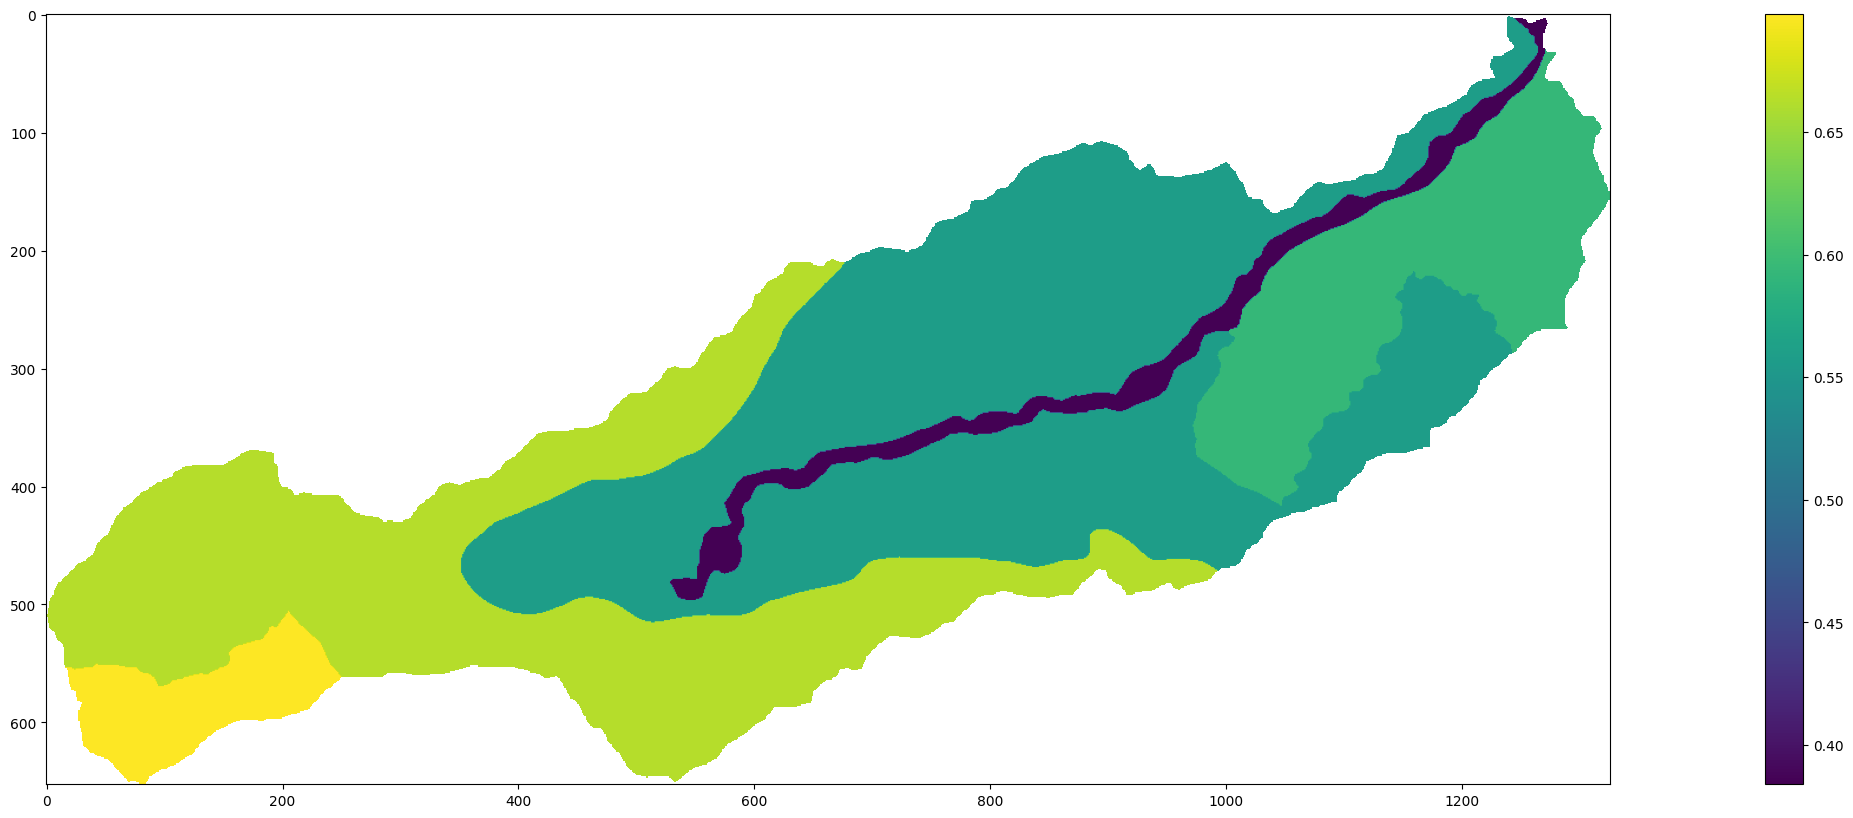

In [6]:
friccionRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2010%20-%20M%C3%A9todos%20f%C3%ADsicos%20acoplados/Datos%20Geot%C3%A9cnicos/friccion.tif?raw=true')
friccion = friccionRaster.read(1)

friccion = np.where(friccion <= 0, np.nan, friccion)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(friccion)
plt.colorbar();

print('Fricción')
print('Forma: ', friccion.shape)
print('Valores únicos: ', np.unique(friccion))

#plt.savefig('GeomorfologiaLectura.png', dpi=500, bbox_inches='tight')

## Permeabilidad

Permeabilidad
Forma:  (653, 1326)
Valores únicos:  [0.018 0.02  0.04  0.06  0.07  0.12    nan]


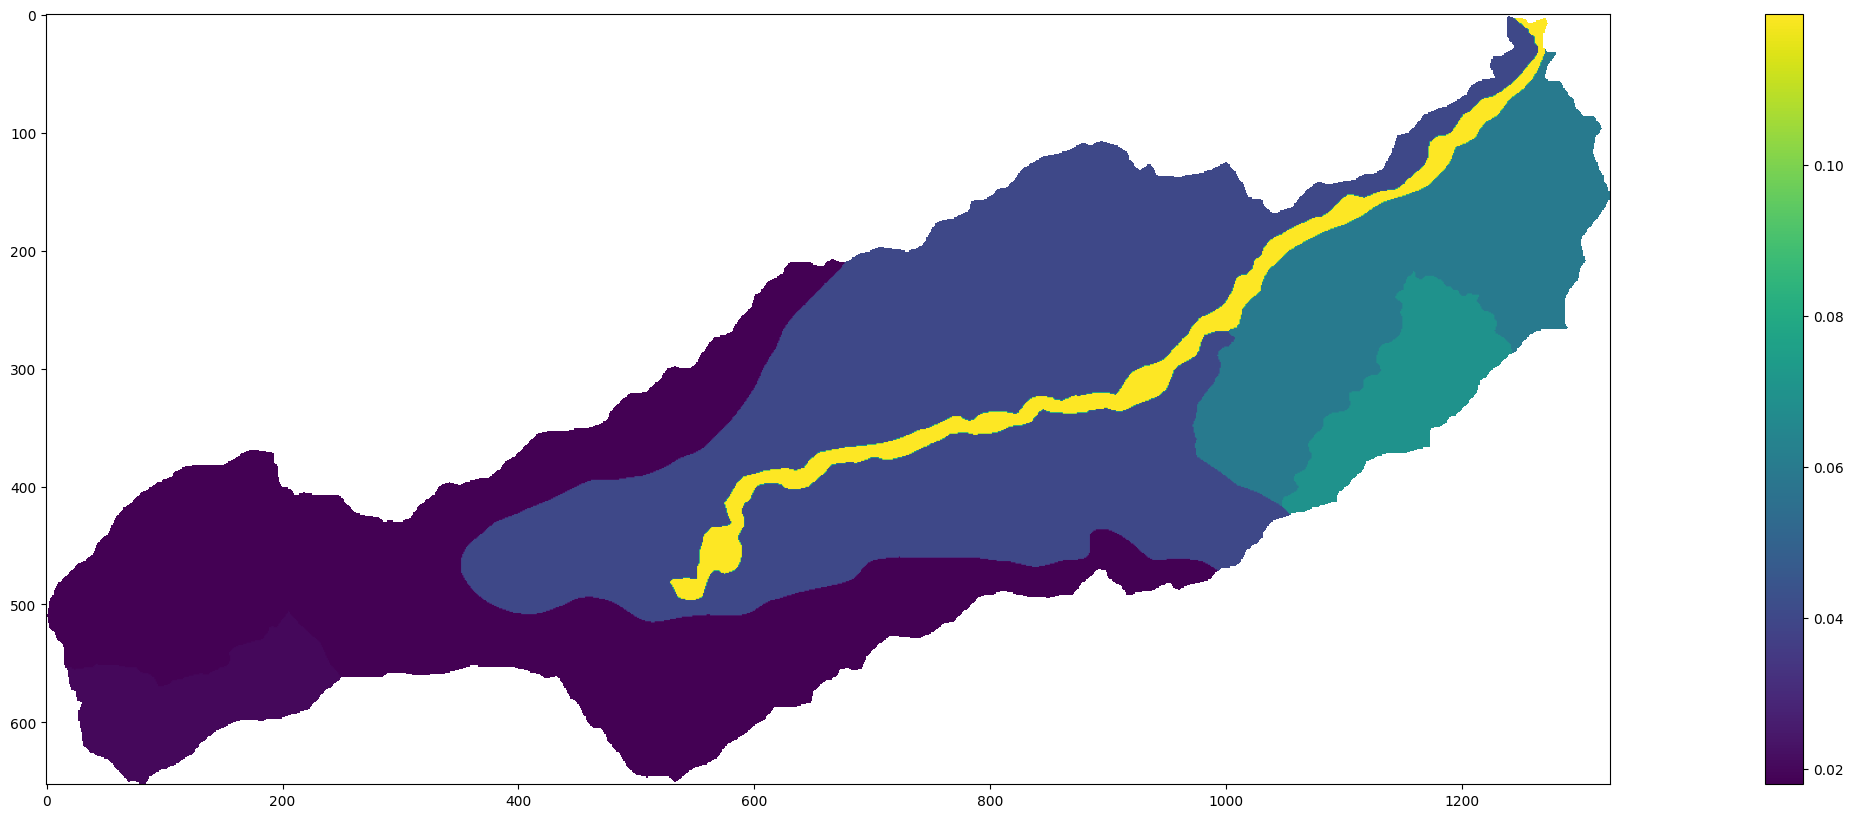

In [7]:
ksRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2010%20-%20M%C3%A9todos%20f%C3%ADsicos%20acoplados/Datos%20Geot%C3%A9cnicos/Permeabilidad.tif?raw=true')
ks = ksRaster.read(1)

ks = np.where(ks == ks.min(), np.nan, ks)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(ks)
plt.colorbar();

print('Permeabilidad')
print('Forma: ', ks.shape)
print('Valores únicos: ', np.unique(ks))

#plt.savefig('PendienteLectura.png', dpi=500, bbox_inches='tight')

## Peso unitario

Peso unitario
Forma:  (653, 1326)
Valores únicos:  [17. 18. 21. 22. 23. nan]


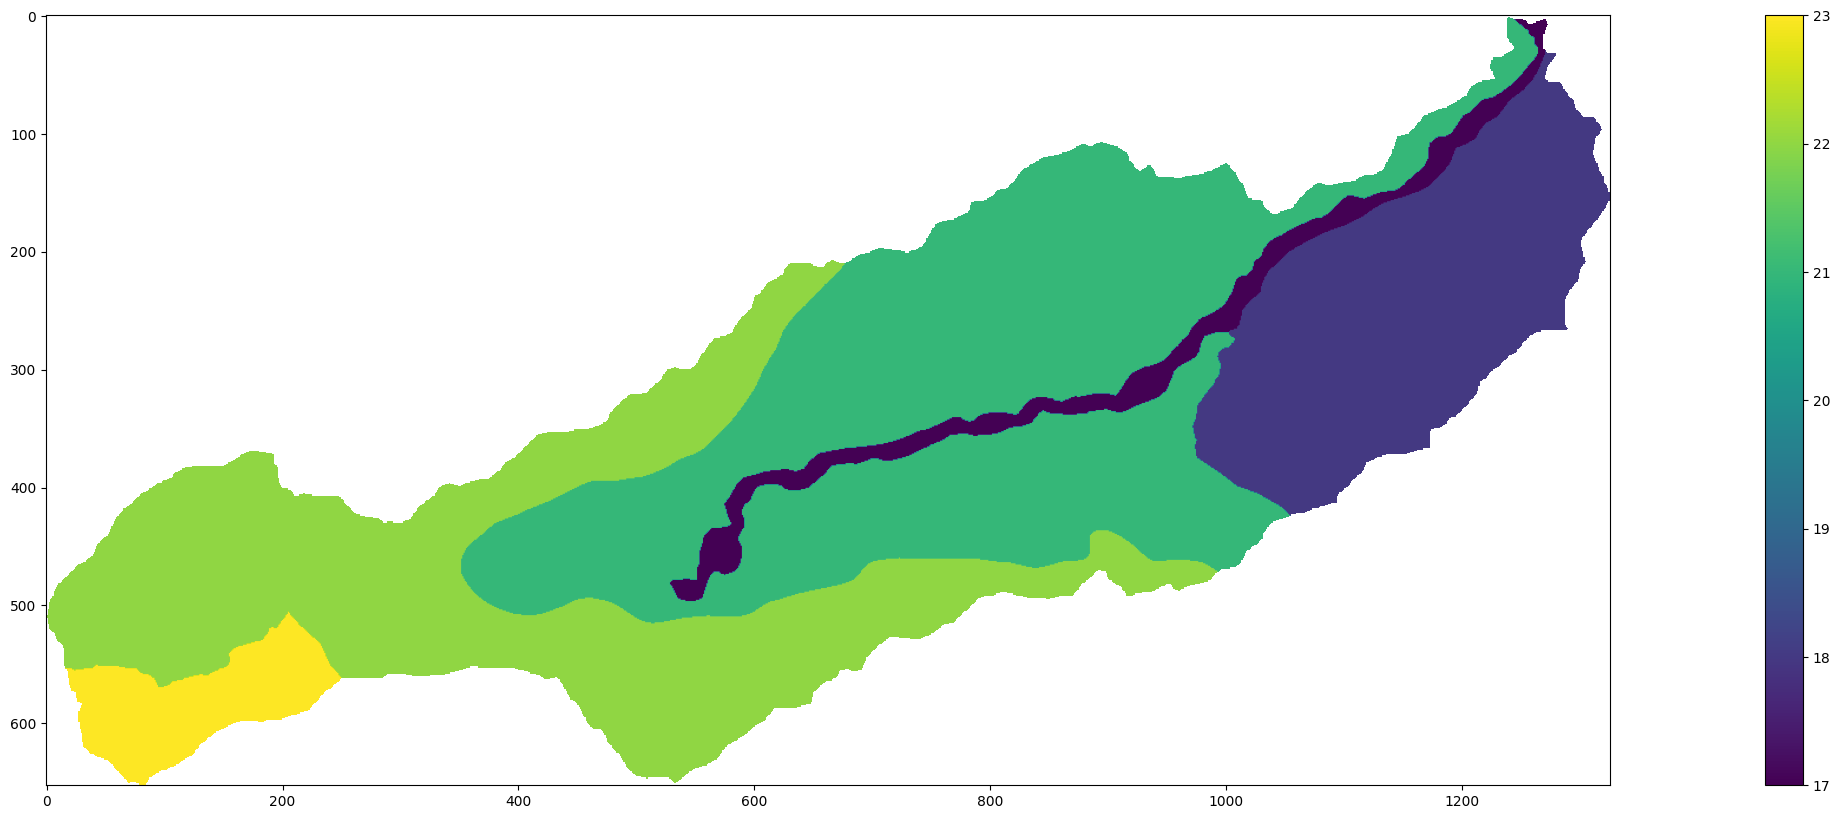

In [8]:
pesoRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2010%20-%20M%C3%A9todos%20f%C3%ADsicos%20acoplados/Datos%20Geot%C3%A9cnicos/peso.tif?raw=true')
peso = pesoRaster.read(1)

peso = np.where(peso == peso.max(), np.nan, peso)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(peso)
plt.colorbar();

print('Peso unitario')
print('Forma: ', peso.shape)
print('Valores únicos: ', np.unique(peso))

#plt.savefig('CurvaturaLectura.png', dpi=500, bbox_inches='tight')

## Flujo Acumulado

flujo Acumulado
Forma:  (653, 1326)
Valores únicos:  [0.00000e+00 1.00000e+00 2.00000e+00 ... 2.15762e+05 2.15838e+05
         nan]


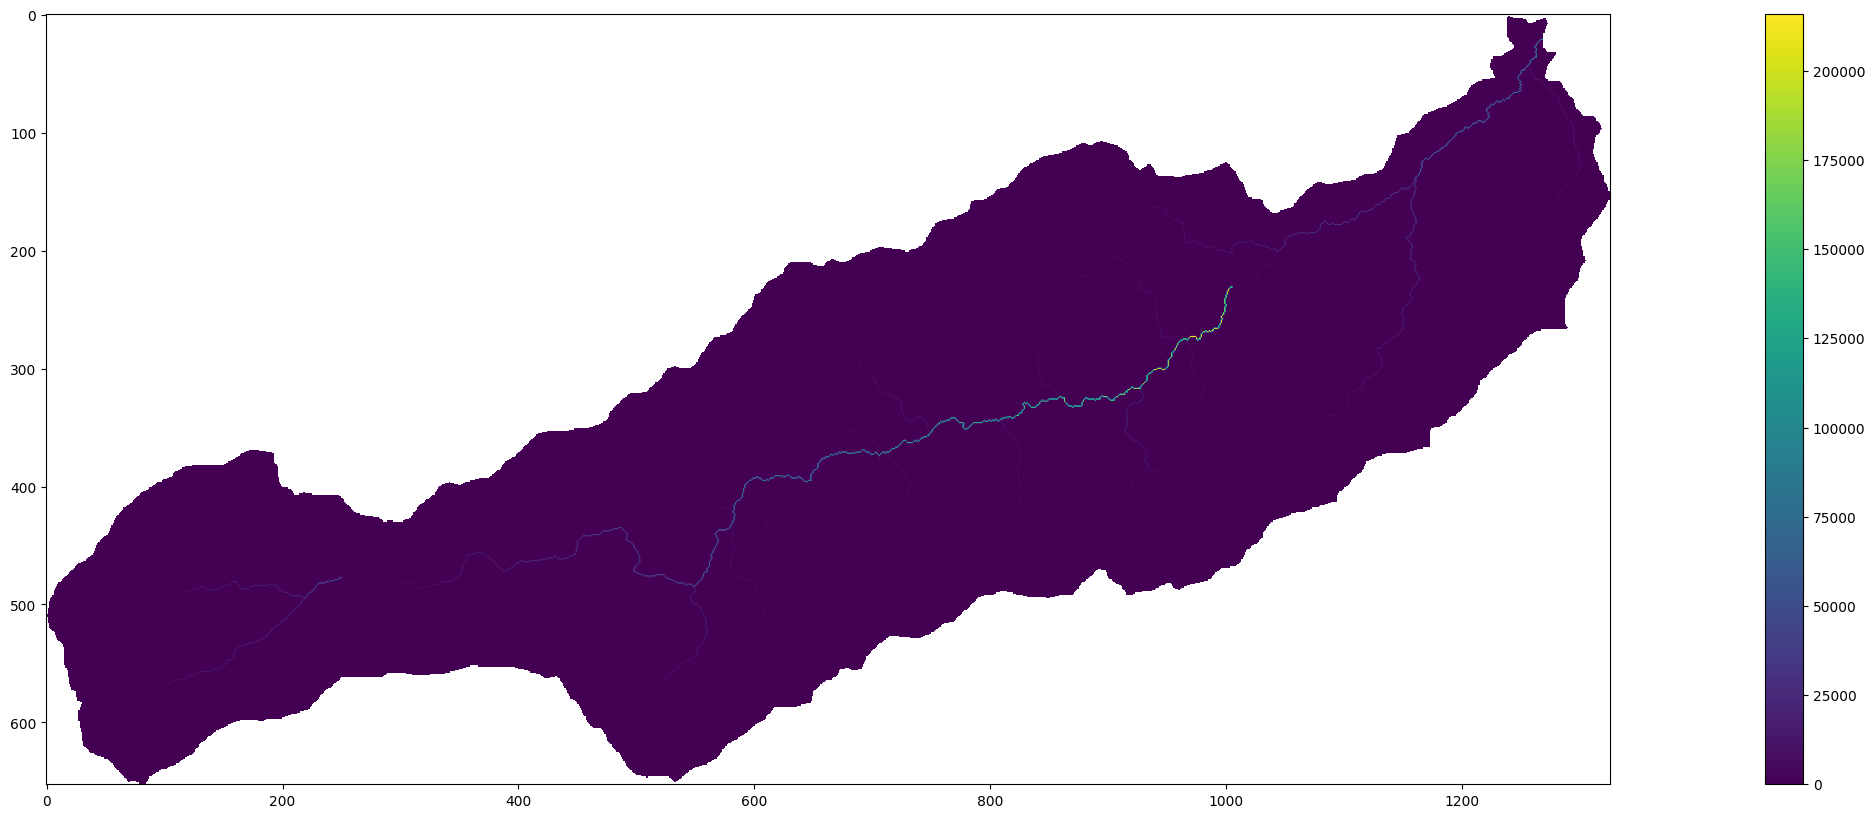

In [9]:
flujoAcumRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2003%20-%20Informaci%C3%B3n%20secundaria/Flujo%20acumulado/Flujo%20acumulado.tif?raw=true')
flujo = flujoAcumRaster.read(1)

flujo = np.where(flujo == flujo.min(), np.nan, flujo)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(flujo)
plt.colorbar();

print('flujo Acumulado')
print('Forma: ',flujo.shape)
print('Valores únicos: ', np.unique(flujo))

#plt.savefig('FlujoAcumLectura.png', dpi=500, bbox_inches='tight')

## Pendiente

Pendientes B1
Forma:  (653, 1326)
Valores únicos:  [0.0000000e+00 8.6316743e-07 1.3810679e-05 ... 1.1791778e+00 1.1889086e+00
           nan]


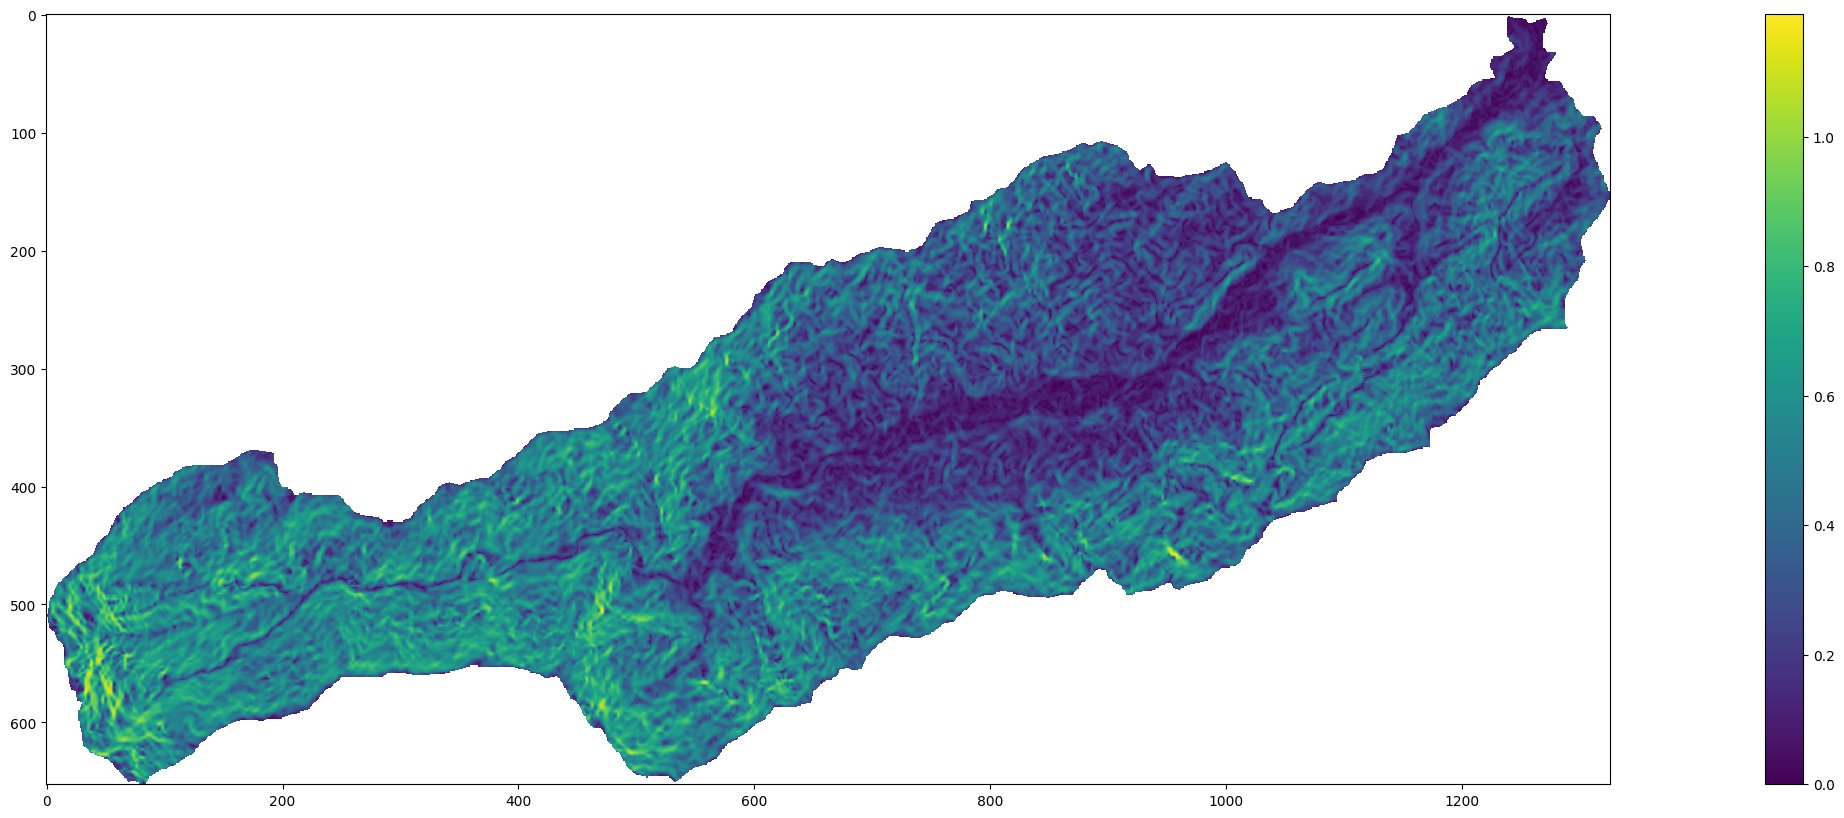

In [10]:
pendienteRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2003%20-%20Informaci%C3%B3n%20secundaria/Pendientes/Tiff/PendienteZona.tif?raw=true')
pendiente = pendienteRaster.read(1)

pendiente = np.where(pendiente == pendiente.min(), np.nan, pendiente)
pendiente = pendiente * (math.pi/180)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(pendiente)
plt.colorbar();

print('Pendientes B1')
print('Forma: ', pendiente.shape)
print('Valores únicos: ', np.unique(pendiente))

#plt.savefig('PendienteLectura.png', dpi=500, bbox_inches='tight')

## Espesor

Espesor
Forma:  (653, 1326)
Valores únicos:  [ 7.  8. 10. 12. 15. 20. nan]


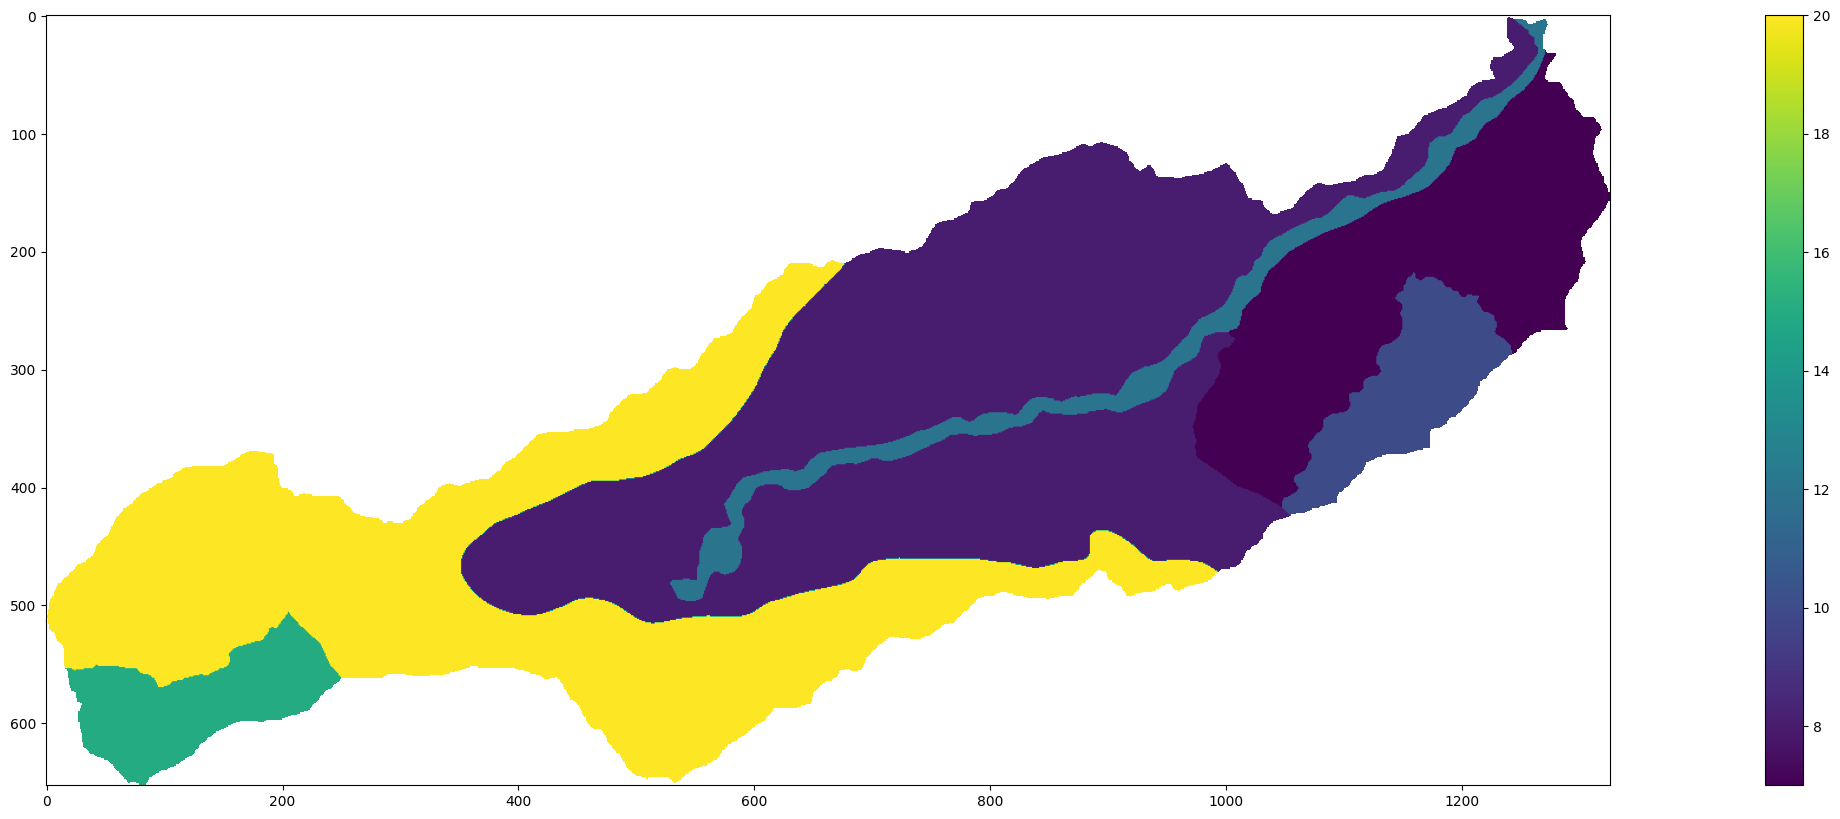

In [11]:
espesorRaster = rio.open('https://github.com/MoisesC04/Cartografia_Geotecnica/blob/main/Taller%2010%20-%20M%C3%A9todos%20f%C3%ADsicos%20acoplados/Datos%20Geot%C3%A9cnicos/Espesor.tif?raw=true')
espesor = espesorRaster.read(1)

espesor = np.where(espesor == espesor.max(), np.nan, espesor)

plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(espesor)
plt.colorbar();

print('Espesor')
print('Forma: ', espesor.shape)
print('Valores únicos: ', np.unique(espesor))

#plt.savefig('PendienteLectura.png', dpi=500, bbox_inches='tight')

# Corriendo Modelo

In [12]:
GammaW   = 9.81 #peso unitario del agua [kN/m3]
dx = 12.5 # resolucion espacial del raster [m]
q = 70 #intensidad de la precipitacion [mm/h]

In [13]:
"STABILITY ANALYSIS"

MatEst = np.zeros(raster.shape)
Matq   = np.zeros(raster.shape)

M4=flujo/dx
M5=((0.01 * ks * (espesor * np.cos(pendiente)) * np.sin(pendiente)) / (0.001*q)) * ((peso / GammaW) * (1 - np.tan(pendiente) / np.tan(friccion)) + (cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))) 
MatEst1=np.where(M4>M5,3,MatEst) #  unstable

MatEst2=np.where(M4<=M5,4,MatEst1) # Stable

M1=np.tan(pendiente)
M2=(1 - (GammaW/peso)) * np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst3  =np.where(M1<M2,1,MatEst2) # Unconditionally stable
	
M3=np.tan(friccion) + (cohesion / (peso * espesor * np.cos(pendiente)**2))
MatEst4  =  np.where(M1>=M3,2,MatEst3) # Unconditionally Unstable

Matq = (1000 * 0.01 * ks * espesor * np.cos(pendiente) * np.sin(pendiente)) * (dx / flujo) * ((peso / GammaW) * (1 - (np.tan(pendiente) / np.tan(friccion))) + cohesion / (GammaW * espesor * np.cos(pendiente)**2 * np.tan(friccion)))
np.nanmin(Matq)

MatEst=np.where(MatEst4 == 0, np.nan,MatEst4)
Matq=np.where(Matq==np.inf,np.nanmax(Matq[Matq!=np.inf]),Matq)

Matq = np.where(M1<M2,-1,np.where(M1>=M3,-2,Matq))

Valores únicos:  [ 1.  2.  3.  4. nan]


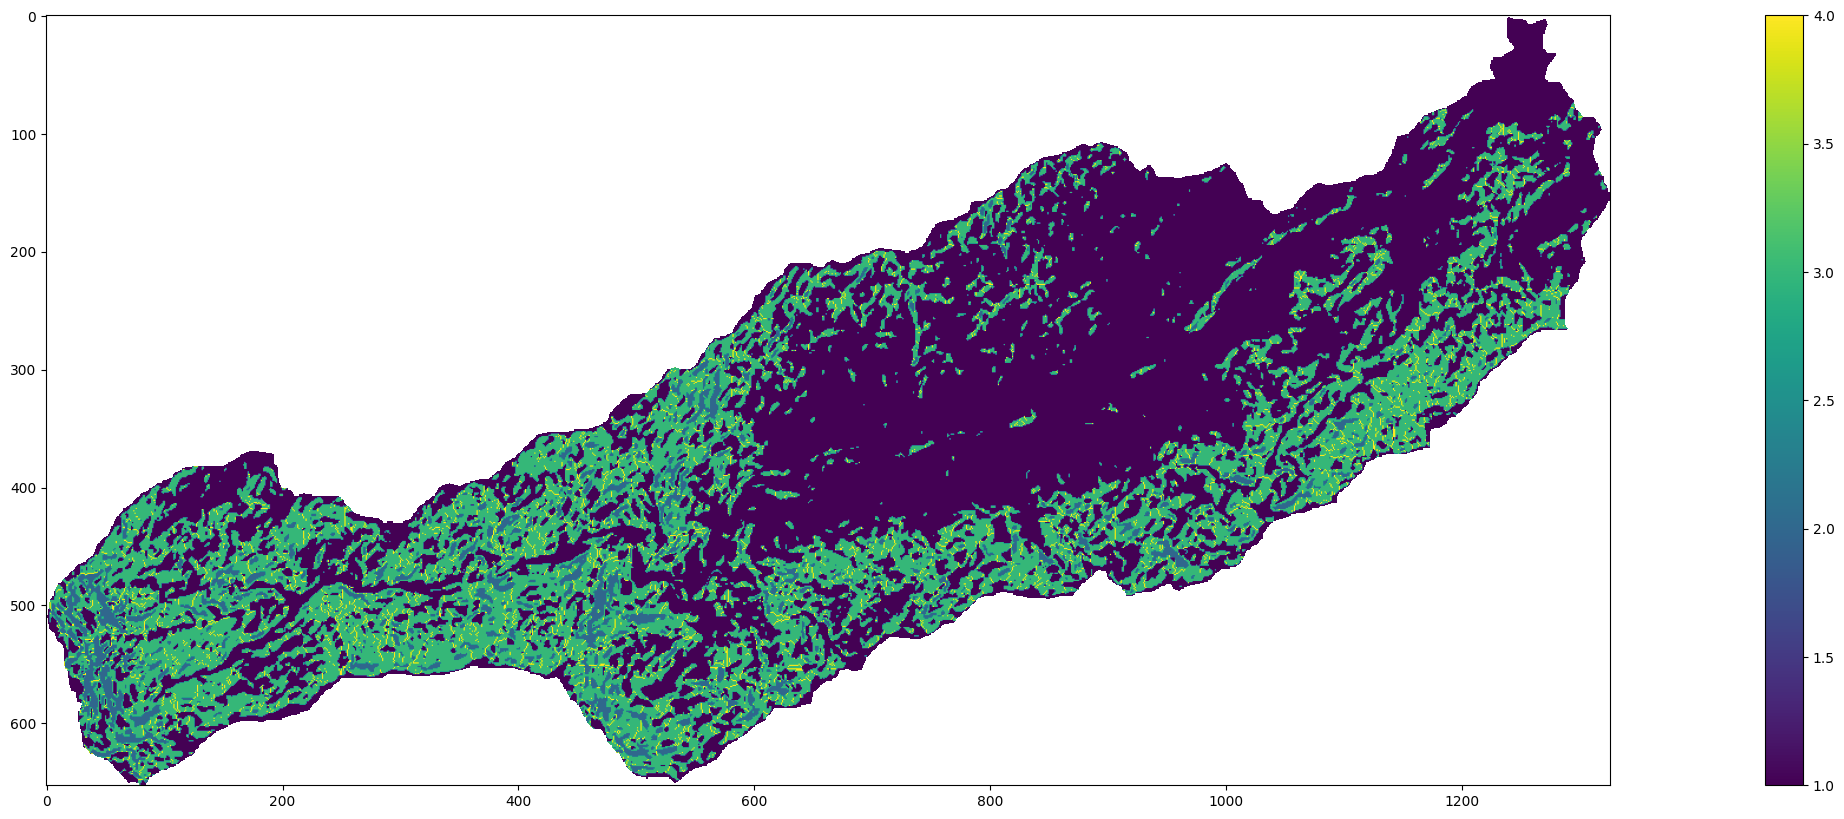

In [16]:
plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(MatEst)
plt.colorbar();

#plt.savefig('BaseFisica_Mapa_4Clasificaciones.png', dpi=500, bbox_inches='tight')
print('Valores únicos: ', np.unique(MatEst))

Valores únicos:  [-2.00000000e+00 -1.00000000e+00  1.56961009e-05 ...  4.05368495e+01
  4.06724209e+01             nan]


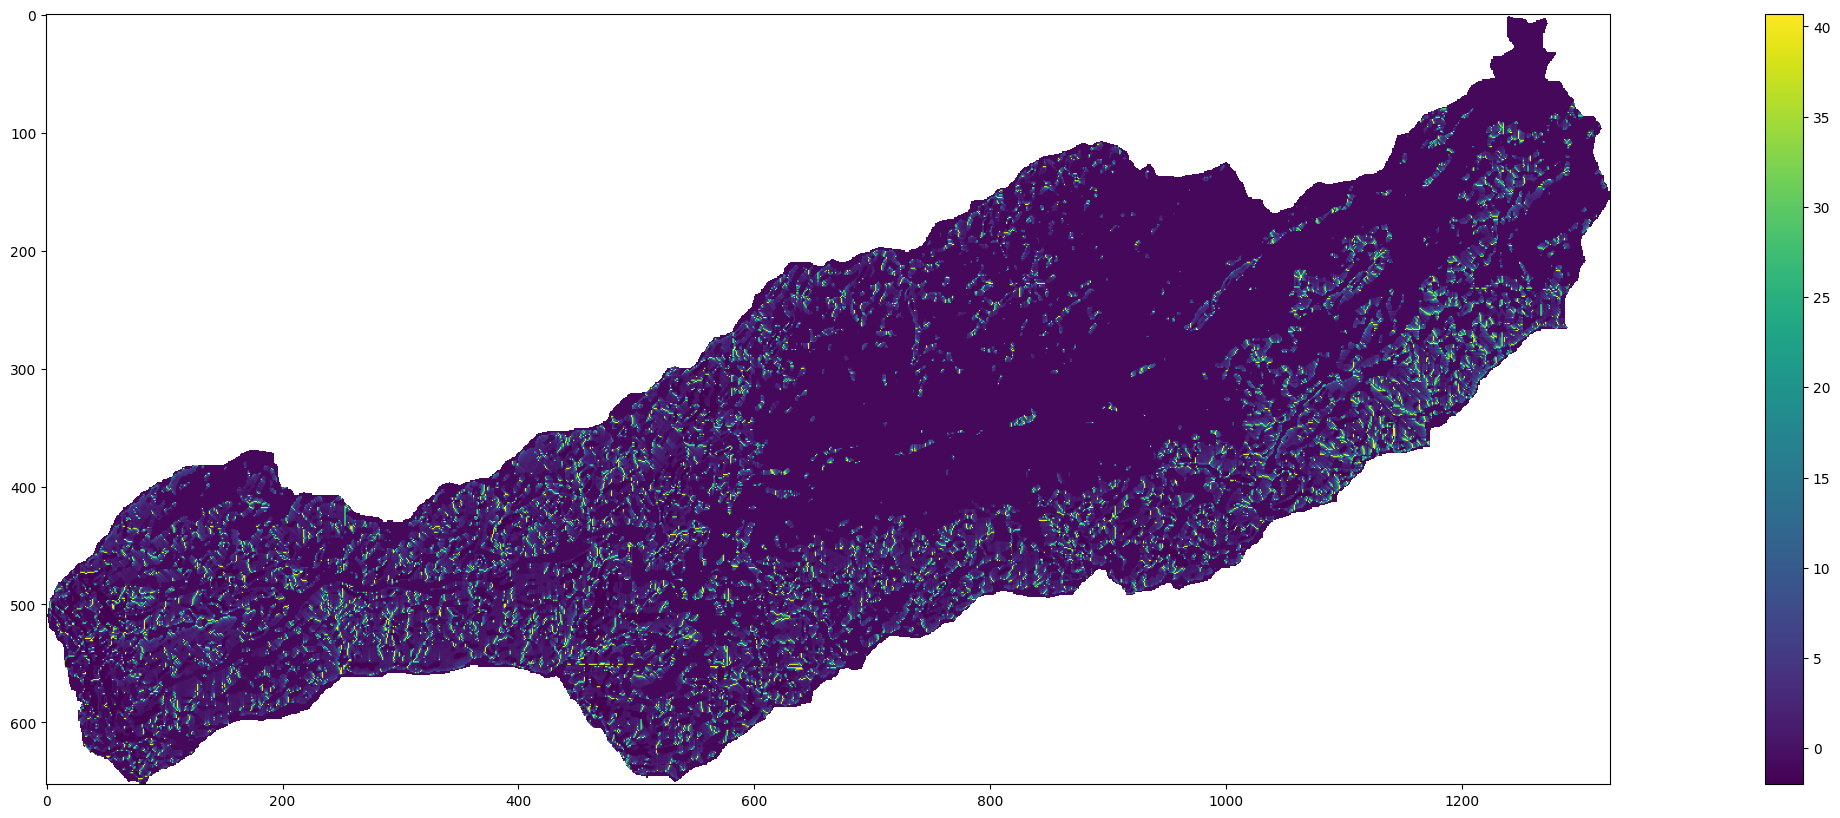

In [17]:
plt.figure(figsize=(40, 10))  # Ajusta el tamaño
plt.imshow(Matq)
plt.colorbar()

#plt.savefig('BaseFisica_Mapa_CantidadLluvia.png', dpi=500, bbox_inches='tight')
print('Valores únicos: ', np.unique(Matq))